<a href="https://colab.research.google.com/github/sbyang369/ImageClassification/blob/main/CanineCare_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import os

In [ ]:
directory_names = ['non','cancer','data']

for directory in directory_names:
  if not os.path.exists(directory):
      os.makedirs(directory)
      print(f"Directory '{directory}' created successfully.")
  else:
      print(f"Directory '{directory}' already exists.")

Directory 'non' created successfully.
Directory 'cancer' created successfully.
Directory 'data' created successfully.


In [ ]:
data_dir = 'data'
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
# Create the ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split for validation
)

# Load the training dataset
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='training'     # Set as training data
)

# Load the validation dataset
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='validation'   # Set as validation data
)

# Build the model
model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),  # Increased filters for better learning
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),  # Sigmoid for binary classification
])

# Compile the model with binary crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Use binary crossentropy for binary classification
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Change this to the desired number of epochs
    validation_data=validation_generator
)


Found 89 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,203,137 (256.36 MB)

 Trainable params: 67,203,137 (256.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.7514 - loss: 4.2195 - val_accuracy: 0.8095 - val_loss: 0.5012
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.4638 - loss: 0.8181 - val_accuracy: 0.8095 - val_loss: 0.5917
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.7705 - loss: 0.5827 - val_accuracy: 0.8095 - val_loss: 0.4840
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.7769 - loss: 0.5506 - val_accuracy: 0.8095 - val_loss: 0.4528
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.7515 - loss: 0.5640 - val_accuracy: 0.8095 - val_loss: 0.4504
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.7725 - loss: 0.5378 - val_accuracy: 0.8095 - val_loss: 0.4545
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.7715 - loss: 0.5134 - val_accuracy: 0.8095 - val_loss: 0.4107
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.7450 - loss: 0.5155 - val_accuracy: 0.8095 - val_loss: 0.3938
Epoch 9/10
3/3 ━━━━

In [ ]:
  model.save('my_model.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,203,139 (256.36 MB)

 Trainable params: 67,203,137 (256.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Score for image: 0.912431538105011


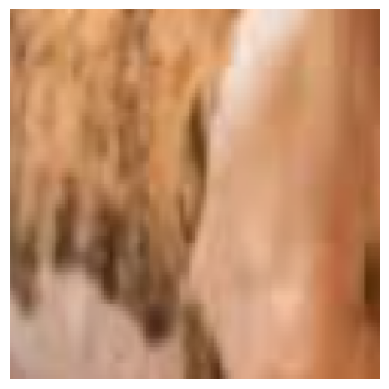

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load the model
model = keras.models.load_model('my_model.h5')
model.summary()  # Check the model input shape

# Load and preprocess the image
img_path = 'noncancerousTest.png'  # Path to your image
img_height, img_width = 256, 256  # Match the input size of your model

# Load the image, resize it, and scale the pixel values
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0  # Rescale the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class score
score = model.predict(img_array)
print(f'Score for image: {score[0][0]}')

# Optionally, display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


Noncancerous: 0.9

Cancerous: 0.65

# ANVIL

In [ ]:
pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
import anvil.server
import anvil.users
anvil.server.connect('server_UCLRCPI3AY47NGTMVKHRZVVD-QWCNJ25HPWG3LVY3')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
from keras.preprocessing.image import load_img
import anvil.server
import anvil.media
import numpy as np
import tensorflow as tf

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f)

    img = np.array(img)
    resize = tf.image.resize(img, (256, 256))
    img_normalized = np.expand_dims(resize / 255, 0)

    prediction = model.predict(img_normalized)  # Make sure 'model' is loaded.

    if prediction > 0.9:
        message = no_tumor
        print(prediction)
    else:
        message = tumor
        print(prediction)

    return message

tumor = (
                "TUMOR DETECTED\n"
            "We strongly recommend consulting with a veterinarian or specialist as soon as possible. "
            "Early detection and timely intervention can significantly improve the prognosis. "
            "This is not a definitive diagnosis but suggests the need for further professional evaluation."
            "\n"
            "Other symptoms that indicate mammory cancer are:\n"
            "- Small, painless lumps or nodules in the mammary glands, about 3 CM in size\n"
            "- Painful abdomen\n"
            "- Discharge from one or more gland\n"
            "- Ulceration of the skin on the abdomens\n"
            "- Lethargy\n"
            "- Weight loss (at later stages)\n"
)

no_tumor = (
                "NO TUMOR DETECTED\n"
            "While the no tumor was detected, it's essential to consult with a medical professional. "
            "Regular veterinary check-ups and preventive care are crucial to your pet's long-term health."
            "\n"
            "Symptoms that indicate mammory cancer are:\n"
            "- Small, painless lumps or nodules in the mammary glands, about 3 CM in size\n"
            "- Painful abdomen\n"
            "- Discharge from one or more gland\n"
            "- Ulceration of the skin on the abdomens\n"
            "- Lethargy\n"
            "- Weight loss (at later stages)"
)


In [ ]:
anvil.server.wait_forever()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[[0.91489154]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[0.330541]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.330541]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.330541]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[0.91489154]]
